<a href="https://colab.research.google.com/github/PocachipMind/Medical-Image-Processing-Model-Development/blob/main/Medical%20image%20file%20format/Pathology_practice/Pathology_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install openslide-tools
!pip install openslide-python

Pathology를 읽어오기 위해 Openslide라는 라이브러리를 사용. \\
https://openslide.org/

dataset:
https://portal.gdc.cancer.gov/

In [2]:
import os
from pathlib import Path
from openslide import OpenSlide
from pprint import pprint
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
BASE_PATH = Path('/content/drive/MyDrive/Medical_AI/pathology_img')
path_img_path = list(BASE_PATH.glob('*/*'))[0]

In [5]:
path_img_path

PosixPath('/content/drive/MyDrive/Medical_AI/pathology_img/bdc28684-e4ce-4fdb-9833-632cb9bfb5aa/TCGA-E~1.SVS')

In [8]:
slide = OpenSlide(path_img_path)

In [9]:
slide

OpenSlide(PosixPath('/content/drive/MyDrive/Medical_AI/pathology_img/bdc28684-e4ce-4fdb-9833-632cb9bfb5aa/TCGA-E~1.SVS'))

In [10]:
def show_path_info(slide):
    print("Patient's dimentsions..:",slide.dimensions)
    print("Patient's z level......:",slide.level_count)
    print("Patient's z dimentsion.:",slide.level_dimensions)


print(f"file size: {round(os.path.getsize(path_img_path) / 1024 ** 2, 2)} MB")
show_path_info(slide)

file size: 319.2 MB
Patient's dimentsions..: (69065, 68679)
Patient's z level......: 4
Patient's z dimentsion.: ((69065, 68679), (17266, 17169), (4316, 4292), (2158, 2146))


In [11]:
pprint(dict(slide.properties)) # dicom처럼 많은 메나데이터가 존재

{'aperio.AppMag': '40',
 'aperio.DSR ID': 'ap1546-dsr',
 'aperio.Date': '11/15/11',
 'aperio.DisplayColor': '0',
 'aperio.Exposure Scale': '0.000001',
 'aperio.Exposure Time': '109',
 'aperio.Filename': '31227',
 'aperio.Focus Offset': '0.000000',
 'aperio.ICC Profile': 'ScanScope v1',
 'aperio.ImageID': '31227',
 'aperio.Left': '42.968620',
 'aperio.LineAreaXOffset': '0.000000',
 'aperio.LineAreaYOffset': '0.000000',
 'aperio.LineCameraSkew': '-0.000389',
 'aperio.MPP': '0.2520',
 'aperio.OriginalHeight': '68779',
 'aperio.OriginalWidth': '72000',
 'aperio.ScanScope ID': 'SS1302',
 'aperio.StripeWidth': '1000',
 'aperio.Time': '16:37:56',
 'aperio.Time Zone': 'GMT-07:00',
 'aperio.Top': '21.434242',
 'aperio.User': '5ceb2363-10c8-43d9-b927-d862d87fb522',
 'openslide.comment': 'Aperio Image Library v10.2.41\r\n'
                      '72000x68779 [0,100 69065x68679] (256x256) J2K/YUV16 '
                      'Q=70|AppMag = 40|StripeWidth = 1000|ScanScope ID = '
                      '

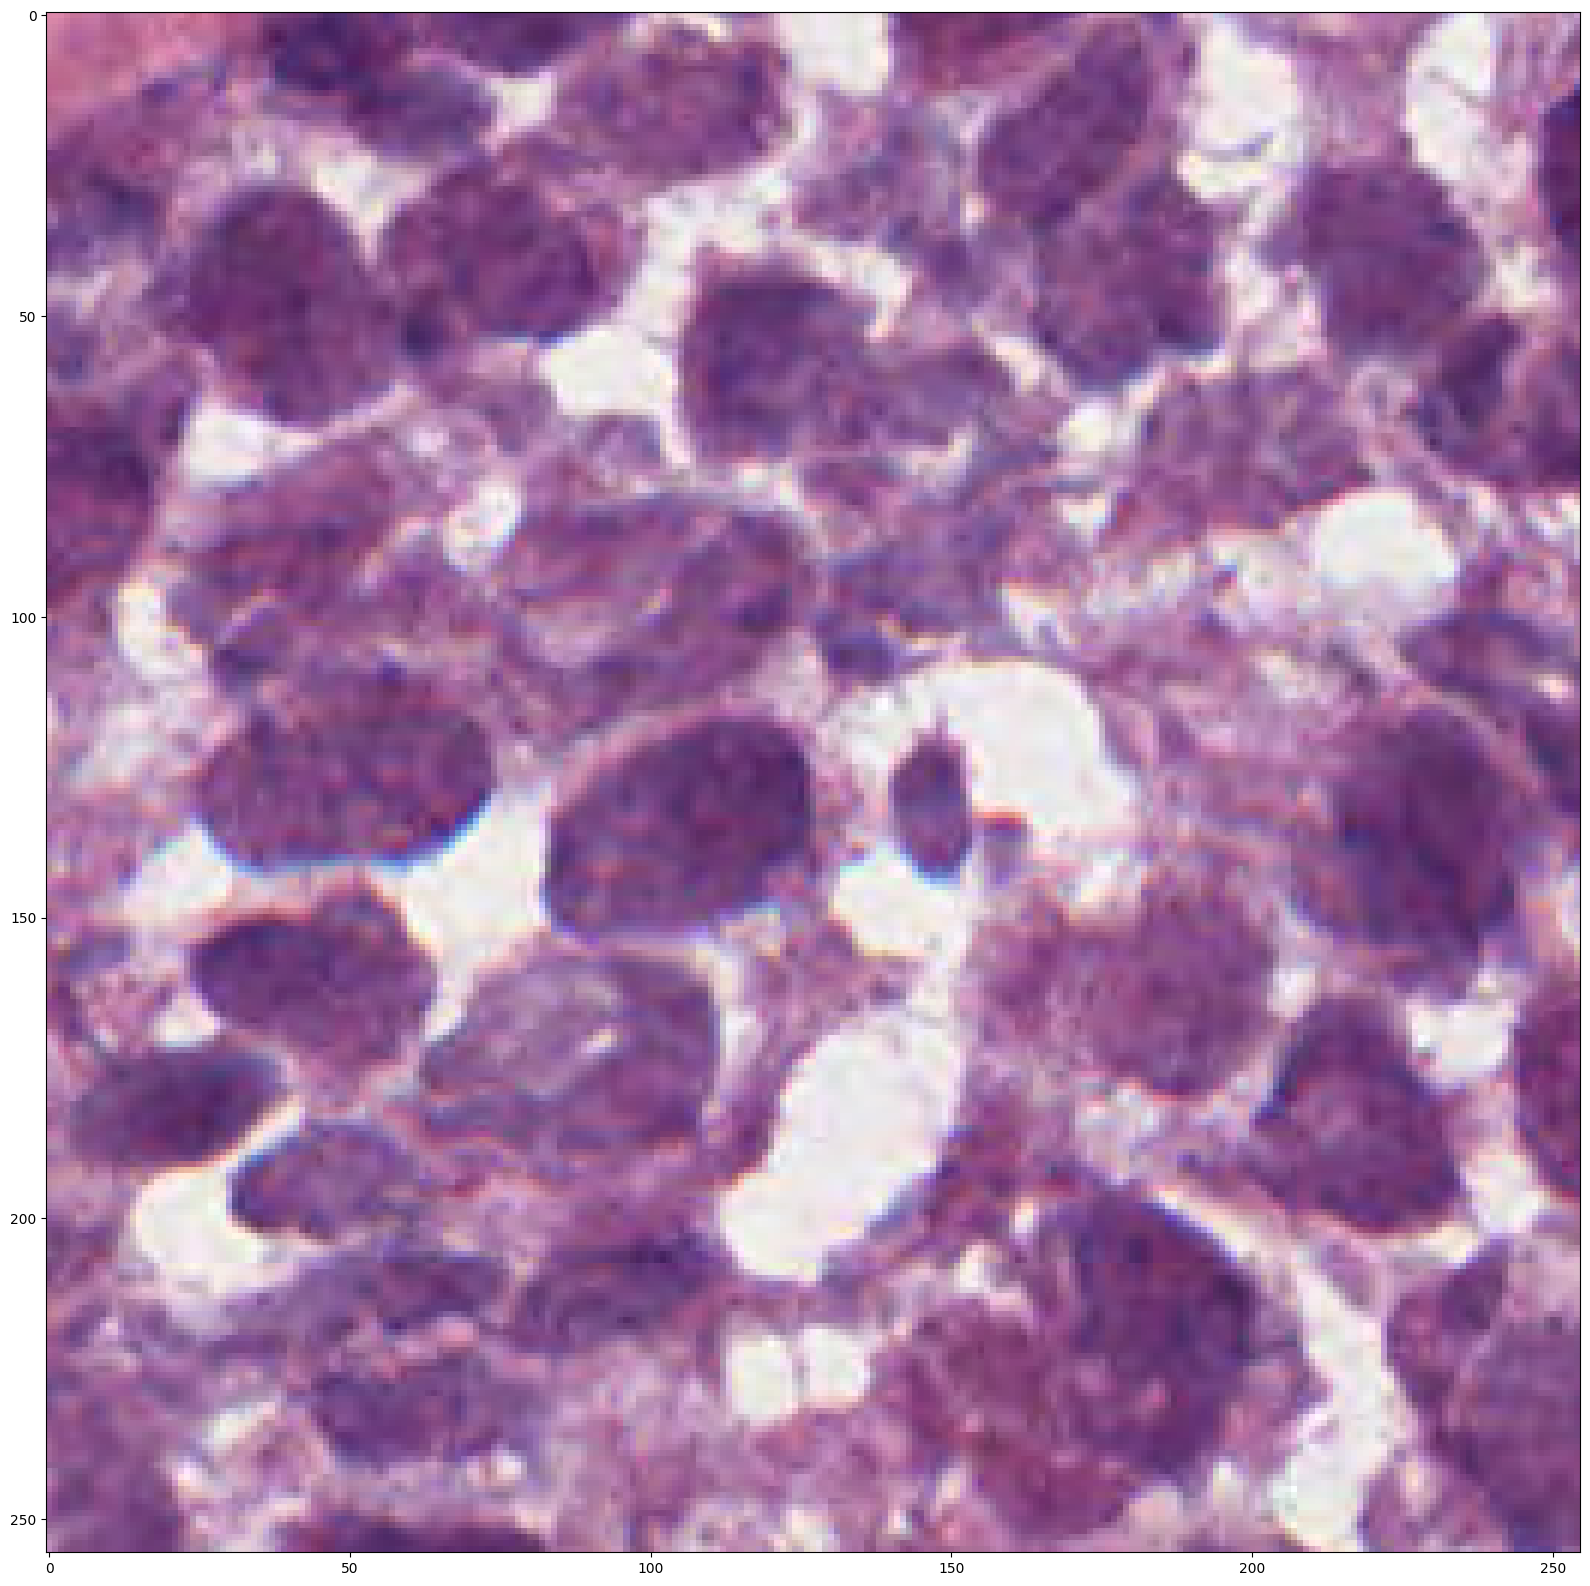

In [13]:
region = (30000,30000) # x, y cordi
level = 0
size = (255, 256) # width , height
region = slide.read_region(region, level, size) # 어느 위치시작, 어느 레벨 선택, 사이즈
plt.figure(figsize=(20, 20))
plt.imshow(region)

```
region = slide.read_region(location, level, size)
```

- 파라미터

  - ```location (tuple)``` : (x, y) 좌표

    - 슬라이드 이미지에서 **추출할 시작 위치(왼쪽 상단 픽셀 위치)** 를 지정.

    - 단위는 **최고 해상도(Level 0)** 기준 픽셀.

  - ```level (int)``` : 줌 레벨

    - 슬라이드 이미지에서 원하는 줌 레벨(0이 가장 고해상도).

    - level=0이면 전체 해상도, level=1이면 해상도가 절반 정도로 줄어든 버전.

  - ```size (tuple)``` : (width, height)

    - 원하는 출력 이미지 크기 (너비, 높이).

   - 지정한 level에 맞게 크기가 조정돼서 반환됨.

- 반환값
  - PIL.Image 객체 (추출된 특정 영역 이미지)



In [14]:
print(region.size)

(255, 256)


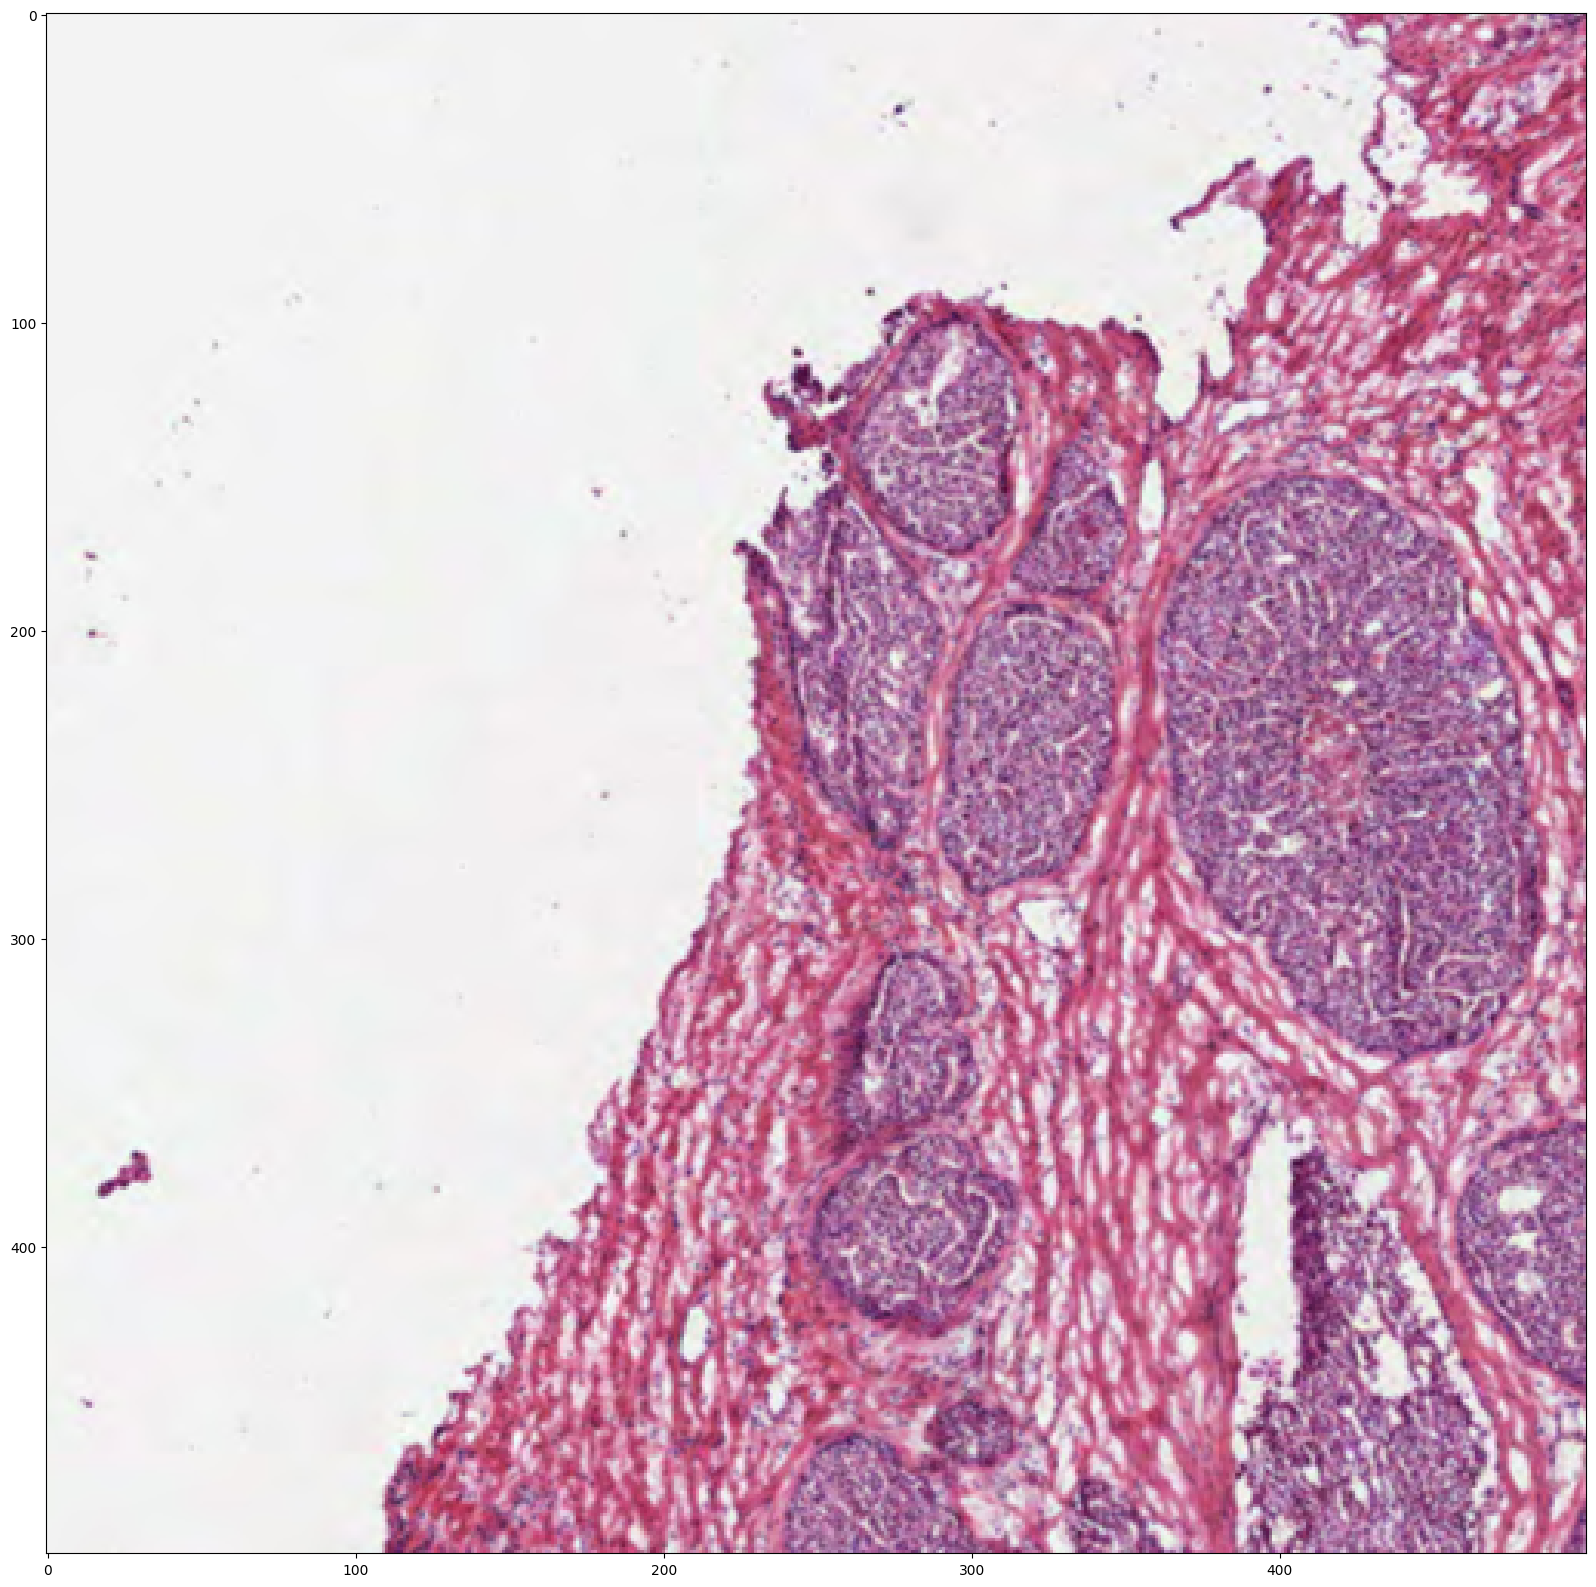

In [15]:
region = (13000,13000)
level = 2
size = (500,500)
region = slide.read_region(region, level, size)
plt.figure(figsize=(20, 20))
plt.imshow(region)

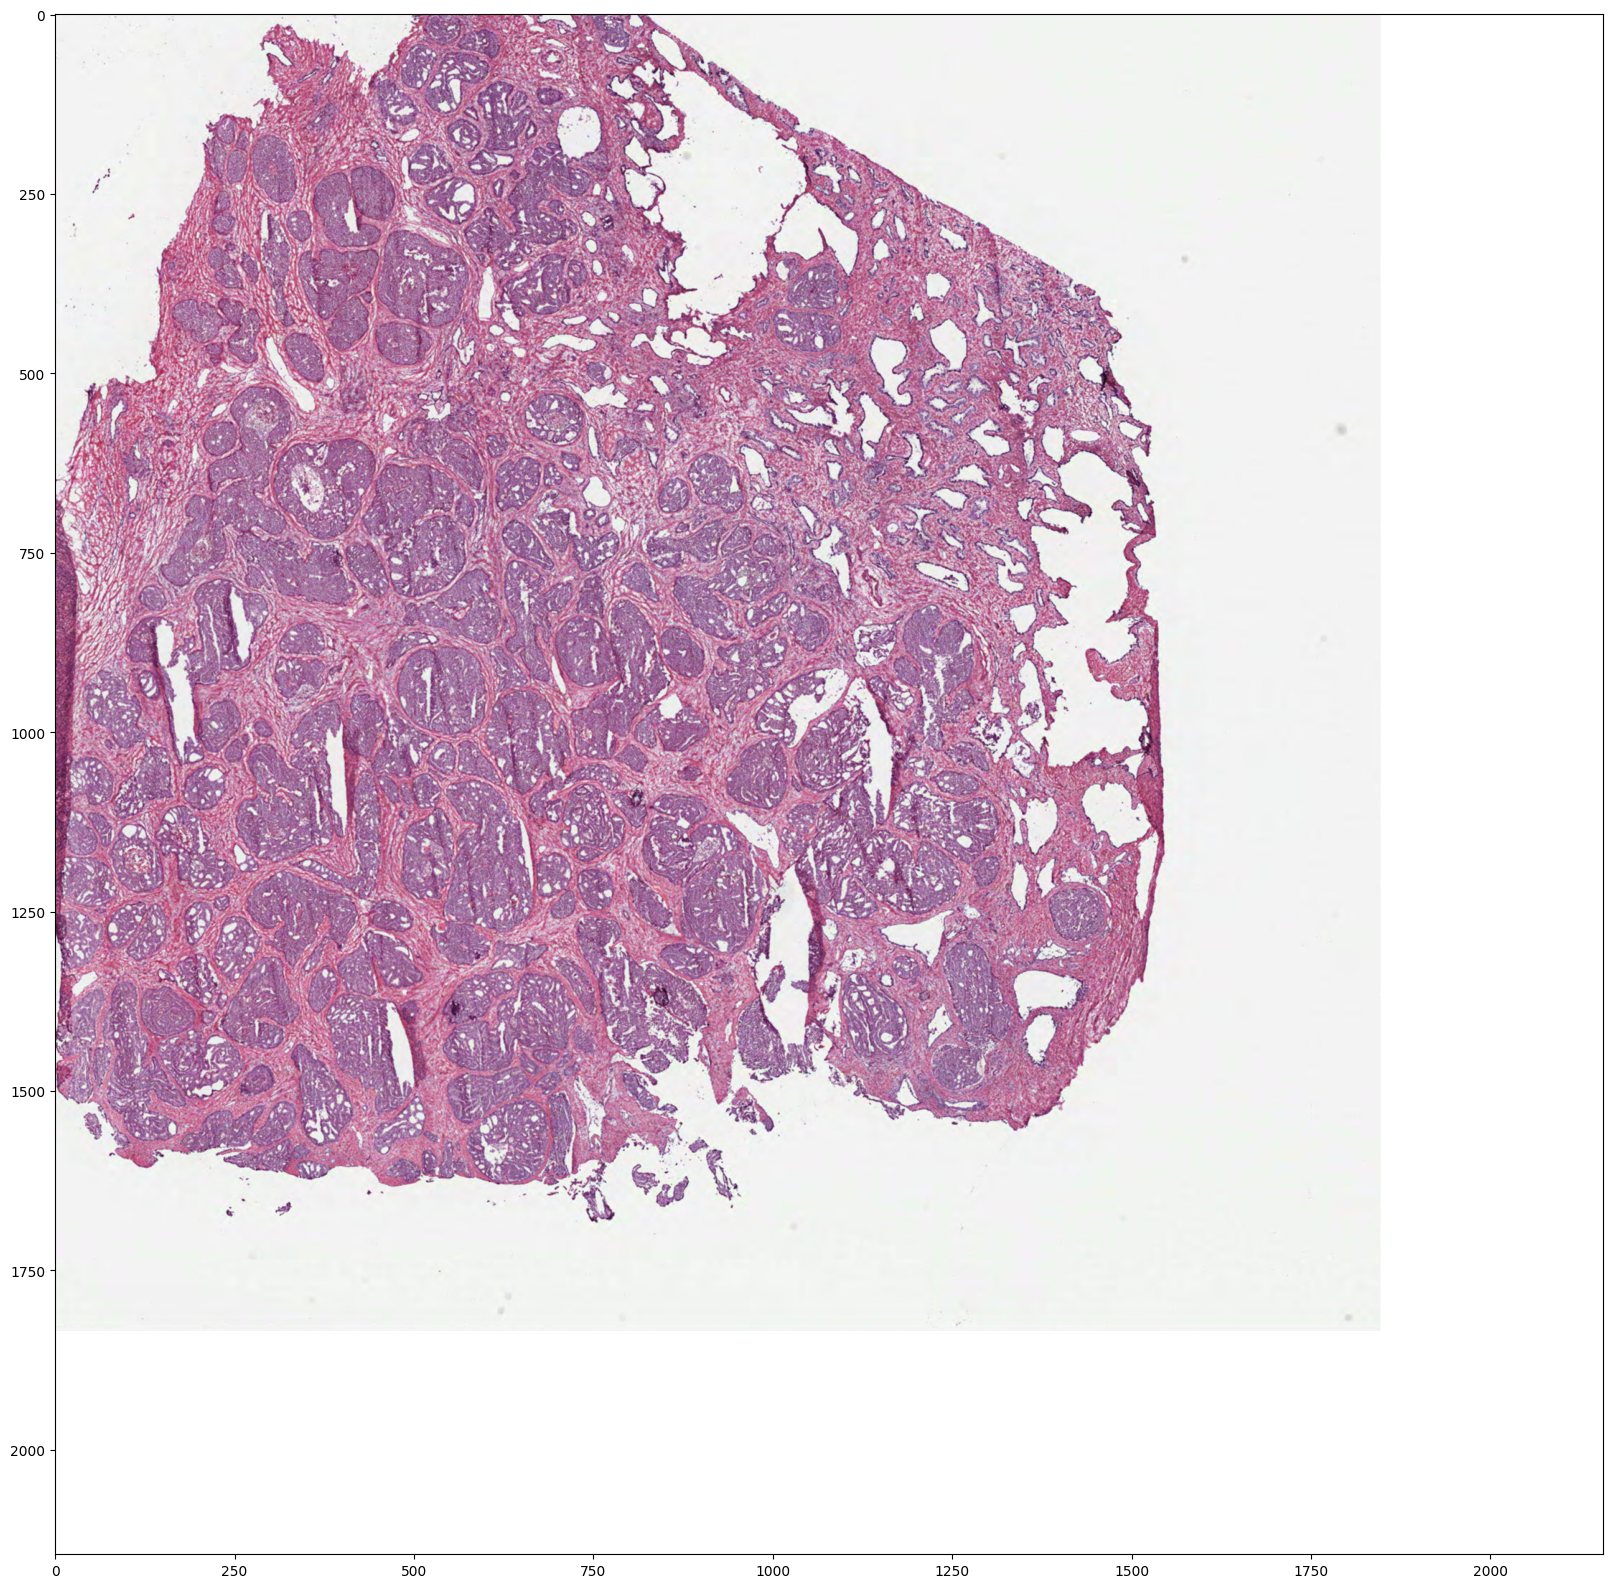

In [ ]:
region = (10000,10000)
level = 3
size = (2158, 2146)
region = slide.read_region(region, level, size)
plt.figure(figsize=(20, 20))
plt.imshow(region)